In [1]:
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt

2023-07-10 04:03:47.863690: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  SSE4.1 SSE4.2 AVX AVX2 FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.


In [2]:
(x_train,_),(x_test,_) = tf.keras.datasets.mnist.load_data()

In [3]:
x_train = x_train/255
x_test = x_test/255

In [11]:
# flatten the 28x28 images into vectors of size 784
x_train = x_train.reshape((len(x_train)),np.prod(x_train.shape[1:]))
x_test = x_test.reshape((len(x_test)),np.prod(x_test.shape[1:]))

In [13]:
# create the autoencoder model

def model_fn():
    model_input = tf.keras.layers.Input(shape=(784,))
    encoded = tf.keras.layers.Dense(units=512,activation='relu')(model_input)
    encoded = tf.keras.layers.Dense(units=128,activation='relu')(encoded)
    encoded = tf.keras.layers.Dense(units=64,activation='relu')(encoded)
    coding_layer = tf.keras.layers.Dense(units=32)(encoded)
    decoded = tf.keras.layers.Dense(units=64,activation='relu')(coding_layer)
    decoded = tf.keras.layers.Dense(units=128,activation='relu')(decoded)
    decoded = tf.keras.layers.Dense(units=512,activation='relu')(decoded)
    decoded_output = tf.keras.layers.Dense(units=784)(decoded)
    
    # the autoencoder model
    autoencoder_model = tf.keras.Model(inputs=model_input,outputs=decoded_output)
    # compile the model
    autoencoder_model.compile(loss='binary_crossentropy',optimizer='adam',metrics=['accuracy'])
    
    return autoencoder_model

In [21]:
autoencode_model = model_fn()


In [22]:
autoencode_model.summary()

Model: "model_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_2 (InputLayer)        [(None, 784)]             0         
                                                                 
 dense_8 (Dense)             (None, 512)               401920    
                                                                 
 dense_9 (Dense)             (None, 128)               65664     
                                                                 
 dense_10 (Dense)            (None, 64)                8256      
                                                                 
 dense_11 (Dense)            (None, 32)                2080      
                                                                 
 dense_12 (Dense)            (None, 64)                2112      
                                                                 
 dense_13 (Dense)            (None, 128)               8320

In [23]:
autoencode_model.fit(x_train,x_train,epochs=1000,batch_size=256,shuffle=True,validation_data=(x_test,x_test))

Epoch 1/1000
235/235 [==============================] - 4s 14ms/step - loss: 0.4589 - accuracy: 0.0089 - val_loss: 0.3652 - val_accuracy: 0.0082
Epoch 2/1000
235/235 [==============================] - 3s 13ms/step - loss: 0.3352 - accuracy: 0.0124 - val_loss: 0.3174 - val_accuracy: 0.0091
Epoch 3/1000
235/235 [==============================] - 3s 13ms/step - loss: 0.3379 - accuracy: 0.0102 - val_loss: 0.3635 - val_accuracy: 0.0041
Epoch 4/1000
235/235 [==============================] - 3s 14ms/step - loss: 0.3136 - accuracy: 0.0106 - val_loss: 0.3028 - val_accuracy: 0.0120
Epoch 5/1000
235/235 [==============================] - 4s 15ms/step - loss: 0.3025 - accuracy: 0.0114 - val_loss: 0.2972 - val_accuracy: 0.0129
Epoch 6/1000
235/235 [==============================] - 4s 16ms/step - loss: 0.2925 - accuracy: 0.0090 - val_loss: 0.2853 - val_accuracy: 0.0155
Epoch 7/1000
235/235 [==============================] - 4s 16ms/step - loss: 0.2846 - accuracy: 0.0104 - val_loss: 0.3060 - val_ac

235/235 [==============================] - 4s 16ms/step - loss: 0.2328 - accuracy: 0.0131 - val_loss: 0.2216 - val_accuracy: 0.0142
Epoch 58/1000
235/235 [==============================] - 4s 15ms/step - loss: 0.2247 - accuracy: 0.0120 - val_loss: 0.2217 - val_accuracy: 0.0090
Epoch 59/1000
235/235 [==============================] - 4s 16ms/step - loss: 0.2252 - accuracy: 0.0078 - val_loss: 0.2143 - val_accuracy: 0.0104
Epoch 60/1000
235/235 [==============================] - 4s 16ms/step - loss: 0.2219 - accuracy: 0.0085 - val_loss: 0.2147 - val_accuracy: 0.0079
Epoch 61/1000
235/235 [==============================] - 4s 16ms/step - loss: 0.2392 - accuracy: 0.0083 - val_loss: 0.2500 - val_accuracy: 0.0061
Epoch 62/1000
235/235 [==============================] - 4s 15ms/step - loss: 0.2345 - accuracy: 0.0091 - val_loss: 0.2206 - val_accuracy: 0.0113
Epoch 63/1000
235/235 [==============================] - 4s 16ms/step - loss: 0.2422 - accuracy: 0.0101 - val_loss: 0.2305 - val_accuracy:

235/235 [==============================] - 4s 16ms/step - loss: 0.2345 - accuracy: 0.0093 - val_loss: 0.2220 - val_accuracy: 0.0106
Epoch 114/1000
235/235 [==============================] - 4s 17ms/step - loss: 0.2299 - accuracy: 0.0106 - val_loss: 0.2226 - val_accuracy: 0.0095
Epoch 115/1000
235/235 [==============================] - 4s 17ms/step - loss: 0.2195 - accuracy: 0.0118 - val_loss: 0.2113 - val_accuracy: 0.0096
Epoch 116/1000
235/235 [==============================] - 4s 16ms/step - loss: 0.2258 - accuracy: 0.0102 - val_loss: 0.2251 - val_accuracy: 0.0111
Epoch 117/1000
235/235 [==============================] - 4s 17ms/step - loss: 0.2235 - accuracy: 0.0100 - val_loss: 0.2187 - val_accuracy: 0.0090
Epoch 118/1000
235/235 [==============================] - 4s 18ms/step - loss: 0.2235 - accuracy: 0.0113 - val_loss: 0.2538 - val_accuracy: 0.0119
Epoch 119/1000
235/235 [==============================] - 4s 18ms/step - loss: 0.2335 - accuracy: 0.0098 - val_loss: 0.2189 - val_acc

Epoch 169/1000
235/235 [==============================] - 4s 15ms/step - loss: 0.2334 - accuracy: 0.0089 - val_loss: 0.2303 - val_accuracy: 0.0087
Epoch 170/1000
235/235 [==============================] - 4s 16ms/step - loss: 0.2345 - accuracy: 0.0112 - val_loss: 0.2248 - val_accuracy: 0.0084
Epoch 171/1000
235/235 [==============================] - 4s 16ms/step - loss: 0.2333 - accuracy: 0.0119 - val_loss: 0.2249 - val_accuracy: 0.0120
Epoch 172/1000
235/235 [==============================] - 4s 15ms/step - loss: 0.2225 - accuracy: 0.0117 - val_loss: 0.2162 - val_accuracy: 0.0104
Epoch 173/1000
235/235 [==============================] - 4s 15ms/step - loss: 0.2211 - accuracy: 0.0109 - val_loss: 0.2218 - val_accuracy: 0.0076
Epoch 174/1000
235/235 [==============================] - 4s 15ms/step - loss: 0.2285 - accuracy: 0.0097 - val_loss: 0.2179 - val_accuracy: 0.0079
Epoch 175/1000
235/235 [==============================] - 4s 15ms/step - loss: 0.2238 - accuracy: 0.0089 - val_loss: 0

Epoch 225/1000
235/235 [==============================] - 4s 16ms/step - loss: 0.2362 - accuracy: 0.0088 - val_loss: 0.2277 - val_accuracy: 0.0077
Epoch 226/1000
235/235 [==============================] - 4s 16ms/step - loss: 0.2282 - accuracy: 0.0070 - val_loss: 0.2304 - val_accuracy: 0.0078
Epoch 227/1000
235/235 [==============================] - 4s 16ms/step - loss: 0.2370 - accuracy: 0.0103 - val_loss: 0.2255 - val_accuracy: 0.0115
Epoch 228/1000
235/235 [==============================] - 4s 16ms/step - loss: 0.2355 - accuracy: 0.0099 - val_loss: 0.2254 - val_accuracy: 0.0097
Epoch 229/1000
235/235 [==============================] - 4s 16ms/step - loss: 0.2362 - accuracy: 0.0108 - val_loss: 0.2303 - val_accuracy: 0.0122
Epoch 230/1000
235/235 [==============================] - 4s 16ms/step - loss: 0.2326 - accuracy: 0.0096 - val_loss: 0.2484 - val_accuracy: 0.0110
Epoch 231/1000
235/235 [==============================] - 4s 16ms/step - loss: 0.2358 - accuracy: 0.0072 - val_loss: 0

Epoch 281/1000
235/235 [==============================] - 4s 16ms/step - loss: 0.2238 - accuracy: 0.0112 - val_loss: 0.2176 - val_accuracy: 0.0100
Epoch 282/1000
235/235 [==============================] - 4s 16ms/step - loss: 0.2207 - accuracy: 0.0099 - val_loss: 0.2150 - val_accuracy: 0.0096
Epoch 283/1000
235/235 [==============================] - 4s 16ms/step - loss: 0.2216 - accuracy: 0.0109 - val_loss: 0.2194 - val_accuracy: 0.0117
Epoch 284/1000
235/235 [==============================] - 4s 15ms/step - loss: 0.2259 - accuracy: 0.0088 - val_loss: 0.2592 - val_accuracy: 0.0146
Epoch 285/1000
235/235 [==============================] - 4s 16ms/step - loss: 0.2318 - accuracy: 0.0121 - val_loss: 0.2235 - val_accuracy: 0.0084
Epoch 286/1000
235/235 [==============================] - 4s 15ms/step - loss: 0.2323 - accuracy: 0.0123 - val_loss: 0.2250 - val_accuracy: 0.0138
Epoch 287/1000
235/235 [==============================] - 4s 16ms/step - loss: 0.2301 - accuracy: 0.0151 - val_loss: 0

Epoch 337/1000
235/235 [==============================] - 3s 15ms/step - loss: 0.2320 - accuracy: 0.0109 - val_loss: 0.2244 - val_accuracy: 0.0101
Epoch 338/1000
235/235 [==============================] - 4s 15ms/step - loss: 0.2244 - accuracy: 0.0118 - val_loss: 0.2240 - val_accuracy: 0.0078
Epoch 339/1000
235/235 [==============================] - 3s 15ms/step - loss: 0.2218 - accuracy: 0.0095 - val_loss: 0.2226 - val_accuracy: 0.0094
Epoch 340/1000
235/235 [==============================] - 4s 16ms/step - loss: 0.2212 - accuracy: 0.0098 - val_loss: 0.2177 - val_accuracy: 0.0069
Epoch 341/1000
235/235 [==============================] - 3s 15ms/step - loss: 0.2234 - accuracy: 0.0086 - val_loss: 0.2236 - val_accuracy: 0.0089
Epoch 342/1000
235/235 [==============================] - 3s 15ms/step - loss: 0.2314 - accuracy: 0.0116 - val_loss: 0.2227 - val_accuracy: 0.0119
Epoch 343/1000
235/235 [==============================] - 4s 15ms/step - loss: 0.2198 - accuracy: 0.0097 - val_loss: 0

Epoch 393/1000
235/235 [==============================] - 4s 15ms/step - loss: 0.2231 - accuracy: 0.0108 - val_loss: 0.2180 - val_accuracy: 0.0110
Epoch 394/1000
235/235 [==============================] - 4s 15ms/step - loss: 0.2187 - accuracy: 0.0112 - val_loss: 0.2150 - val_accuracy: 0.0120
Epoch 395/1000
235/235 [==============================] - 4s 15ms/step - loss: 0.2205 - accuracy: 0.0122 - val_loss: 0.2329 - val_accuracy: 0.0110
Epoch 396/1000
235/235 [==============================] - 4s 15ms/step - loss: 0.2233 - accuracy: 0.0119 - val_loss: 0.2202 - val_accuracy: 0.0112
Epoch 397/1000
235/235 [==============================] - 4s 15ms/step - loss: 0.2228 - accuracy: 0.0089 - val_loss: 0.2394 - val_accuracy: 0.0057
Epoch 398/1000
235/235 [==============================] - 4s 15ms/step - loss: 0.2417 - accuracy: 0.0091 - val_loss: 0.2298 - val_accuracy: 0.0082
Epoch 399/1000
235/235 [==============================] - 4s 15ms/step - loss: 0.2281 - accuracy: 0.0107 - val_loss: 0

Epoch 449/1000
235/235 [==============================] - 4s 16ms/step - loss: 0.2495 - accuracy: 0.0116 - val_loss: 0.2443 - val_accuracy: 0.0132
Epoch 450/1000
235/235 [==============================] - 4s 15ms/step - loss: 0.2430 - accuracy: 0.0133 - val_loss: 0.2425 - val_accuracy: 0.0104
Epoch 451/1000
235/235 [==============================] - 4s 15ms/step - loss: 0.2486 - accuracy: 0.0131 - val_loss: 0.2477 - val_accuracy: 0.0128
Epoch 452/1000
235/235 [==============================] - 4s 16ms/step - loss: 0.2501 - accuracy: 0.0138 - val_loss: 0.2572 - val_accuracy: 0.0130
Epoch 453/1000
235/235 [==============================] - 4s 15ms/step - loss: 0.2443 - accuracy: 0.0159 - val_loss: 0.2357 - val_accuracy: 0.0160
Epoch 454/1000
235/235 [==============================] - 4s 15ms/step - loss: 0.2386 - accuracy: 0.0158 - val_loss: 0.2358 - val_accuracy: 0.0093
Epoch 455/1000
235/235 [==============================] - 4s 15ms/step - loss: 0.2478 - accuracy: 0.0112 - val_loss: 0

Epoch 505/1000
235/235 [==============================] - 4s 15ms/step - loss: 0.2548 - accuracy: 0.0154 - val_loss: 0.2524 - val_accuracy: 0.0186
Epoch 506/1000
235/235 [==============================] - 4s 16ms/step - loss: 0.2526 - accuracy: 0.0175 - val_loss: 0.2486 - val_accuracy: 0.0156
Epoch 507/1000
235/235 [==============================] - 4s 16ms/step - loss: 0.2507 - accuracy: 0.0176 - val_loss: 0.2585 - val_accuracy: 0.0092
Epoch 508/1000
235/235 [==============================] - 4s 16ms/step - loss: 0.2506 - accuracy: 0.0127 - val_loss: 0.2479 - val_accuracy: 0.0128
Epoch 509/1000
235/235 [==============================] - 4s 16ms/step - loss: 0.2500 - accuracy: 0.0145 - val_loss: 0.2460 - val_accuracy: 0.0135
Epoch 510/1000
235/235 [==============================] - 4s 15ms/step - loss: 0.2502 - accuracy: 0.0135 - val_loss: 0.2472 - val_accuracy: 0.0121
Epoch 511/1000
235/235 [==============================] - 4s 15ms/step - loss: 0.2516 - accuracy: 0.0149 - val_loss: 0

Epoch 561/1000
235/235 [==============================] - 4s 15ms/step - loss: 0.2406 - accuracy: 0.0107 - val_loss: 0.2346 - val_accuracy: 0.0099
Epoch 562/1000
235/235 [==============================] - 4s 16ms/step - loss: 0.2357 - accuracy: 0.0114 - val_loss: 0.2326 - val_accuracy: 0.0100
Epoch 563/1000
235/235 [==============================] - 4s 16ms/step - loss: 0.2344 - accuracy: 0.0120 - val_loss: 0.2342 - val_accuracy: 0.0113
Epoch 564/1000
235/235 [==============================] - 4s 15ms/step - loss: 0.2356 - accuracy: 0.0118 - val_loss: 0.2329 - val_accuracy: 0.0082
Epoch 565/1000
235/235 [==============================] - 4s 16ms/step - loss: 0.2386 - accuracy: 0.0114 - val_loss: 0.2338 - val_accuracy: 0.0131
Epoch 566/1000
235/235 [==============================] - 4s 16ms/step - loss: 0.2348 - accuracy: 0.0129 - val_loss: 0.2305 - val_accuracy: 0.0103
Epoch 567/1000
235/235 [==============================] - 4s 16ms/step - loss: 0.2337 - accuracy: 0.0108 - val_loss: 0

Epoch 617/1000
235/235 [==============================] - 4s 15ms/step - loss: 0.2346 - accuracy: 0.0120 - val_loss: 0.2314 - val_accuracy: 0.0111
Epoch 618/1000
235/235 [==============================] - 4s 15ms/step - loss: 0.2379 - accuracy: 0.0145 - val_loss: 0.2337 - val_accuracy: 0.0127
Epoch 619/1000
235/235 [==============================] - 4s 16ms/step - loss: 0.2438 - accuracy: 0.0114 - val_loss: 0.2369 - val_accuracy: 0.0097
Epoch 620/1000
235/235 [==============================] - 4s 15ms/step - loss: 0.2373 - accuracy: 0.0108 - val_loss: 0.2310 - val_accuracy: 0.0109
Epoch 621/1000
235/235 [==============================] - 4s 16ms/step - loss: 0.2415 - accuracy: 0.0146 - val_loss: 0.2422 - val_accuracy: 0.0139
Epoch 622/1000
235/235 [==============================] - 4s 15ms/step - loss: 0.2445 - accuracy: 0.0170 - val_loss: 0.2360 - val_accuracy: 0.0155
Epoch 623/1000
235/235 [==============================] - 4s 16ms/step - loss: 0.2460 - accuracy: 0.0155 - val_loss: 0

Epoch 673/1000
235/235 [==============================] - 4s 16ms/step - loss: 0.2322 - accuracy: 0.0127 - val_loss: 0.2386 - val_accuracy: 0.0095
Epoch 674/1000
235/235 [==============================] - 4s 15ms/step - loss: 0.2328 - accuracy: 0.0114 - val_loss: 0.2295 - val_accuracy: 0.0095
Epoch 675/1000
235/235 [==============================] - 4s 16ms/step - loss: 0.2283 - accuracy: 0.0104 - val_loss: 0.2250 - val_accuracy: 0.0092
Epoch 676/1000
235/235 [==============================] - 4s 15ms/step - loss: 0.2301 - accuracy: 0.0120 - val_loss: 0.2257 - val_accuracy: 0.0116
Epoch 677/1000
235/235 [==============================] - 4s 16ms/step - loss: 0.2290 - accuracy: 0.0121 - val_loss: 0.2279 - val_accuracy: 0.0087
Epoch 678/1000
235/235 [==============================] - 4s 15ms/step - loss: 0.2307 - accuracy: 0.0137 - val_loss: 0.2286 - val_accuracy: 0.0126
Epoch 679/1000
235/235 [==============================] - 4s 16ms/step - loss: 0.2270 - accuracy: 0.0145 - val_loss: 0

Epoch 729/1000
235/235 [==============================] - 4s 16ms/step - loss: 0.2371 - accuracy: 0.0121 - val_loss: 0.2335 - val_accuracy: 0.0098
Epoch 730/1000
235/235 [==============================] - 4s 16ms/step - loss: 0.2358 - accuracy: 0.0132 - val_loss: 0.2305 - val_accuracy: 0.0125
Epoch 731/1000
235/235 [==============================] - 4s 15ms/step - loss: 0.2329 - accuracy: 0.0116 - val_loss: 0.2299 - val_accuracy: 0.0095
Epoch 732/1000
235/235 [==============================] - 4s 16ms/step - loss: 0.2342 - accuracy: 0.0119 - val_loss: 0.2296 - val_accuracy: 0.0113
Epoch 733/1000
235/235 [==============================] - 4s 15ms/step - loss: 0.2352 - accuracy: 0.0128 - val_loss: 0.2329 - val_accuracy: 0.0135
Epoch 734/1000
235/235 [==============================] - 4s 16ms/step - loss: 0.2357 - accuracy: 0.0143 - val_loss: 0.2373 - val_accuracy: 0.0076
Epoch 735/1000
235/235 [==============================] - 4s 16ms/step - loss: 0.2432 - accuracy: 0.0155 - val_loss: 0

Epoch 785/1000
235/235 [==============================] - 4s 15ms/step - loss: 0.2399 - accuracy: 0.0163 - val_loss: 0.2338 - val_accuracy: 0.0120
Epoch 786/1000
235/235 [==============================] - 4s 16ms/step - loss: 0.2415 - accuracy: 0.0115 - val_loss: 0.2345 - val_accuracy: 0.0092
Epoch 787/1000
235/235 [==============================] - 4s 15ms/step - loss: 0.2380 - accuracy: 0.0111 - val_loss: 0.2342 - val_accuracy: 0.0133
Epoch 788/1000
235/235 [==============================] - 4s 16ms/step - loss: 0.2380 - accuracy: 0.0131 - val_loss: 0.2395 - val_accuracy: 0.0103
Epoch 789/1000
235/235 [==============================] - 4s 16ms/step - loss: 0.2357 - accuracy: 0.0130 - val_loss: 0.2314 - val_accuracy: 0.0105
Epoch 790/1000
235/235 [==============================] - 4s 15ms/step - loss: 0.2342 - accuracy: 0.0100 - val_loss: 0.2325 - val_accuracy: 0.0098
Epoch 791/1000
235/235 [==============================] - 4s 16ms/step - loss: 0.2550 - accuracy: 0.0107 - val_loss: 0

Epoch 841/1000
235/235 [==============================] - 4s 16ms/step - loss: 0.2349 - accuracy: 0.0094 - val_loss: 0.2319 - val_accuracy: 0.0103
Epoch 842/1000
235/235 [==============================] - 4s 16ms/step - loss: 0.2444 - accuracy: 0.0089 - val_loss: 0.2351 - val_accuracy: 0.0061
Epoch 843/1000
235/235 [==============================] - 4s 16ms/step - loss: 0.2367 - accuracy: 0.0090 - val_loss: 0.2330 - val_accuracy: 0.0086
Epoch 844/1000
235/235 [==============================] - 4s 15ms/step - loss: 0.2371 - accuracy: 0.0105 - val_loss: 0.2334 - val_accuracy: 0.0093
Epoch 845/1000
235/235 [==============================] - 4s 16ms/step - loss: 0.2361 - accuracy: 0.0106 - val_loss: 0.2330 - val_accuracy: 0.0095
Epoch 846/1000
235/235 [==============================] - 4s 15ms/step - loss: 0.2457 - accuracy: 0.0102 - val_loss: 0.2392 - val_accuracy: 0.0121
Epoch 847/1000
235/235 [==============================] - 4s 16ms/step - loss: 0.2389 - accuracy: 0.0116 - val_loss: 0

Epoch 897/1000
235/235 [==============================] - 4s 16ms/step - loss: 0.2373 - accuracy: 0.0117 - val_loss: 0.2329 - val_accuracy: 0.0158
Epoch 898/1000
235/235 [==============================] - 4s 16ms/step - loss: 0.2392 - accuracy: 0.0117 - val_loss: 0.2357 - val_accuracy: 0.0130
Epoch 899/1000
235/235 [==============================] - 4s 16ms/step - loss: 0.2442 - accuracy: 0.0141 - val_loss: 0.2359 - val_accuracy: 0.0125
Epoch 900/1000
235/235 [==============================] - 4s 16ms/step - loss: 0.2362 - accuracy: 0.0100 - val_loss: 0.2326 - val_accuracy: 0.0063
Epoch 901/1000
235/235 [==============================] - 4s 16ms/step - loss: 0.2351 - accuracy: 0.0093 - val_loss: 0.2323 - val_accuracy: 0.0083
Epoch 902/1000
235/235 [==============================] - 4s 16ms/step - loss: 0.2406 - accuracy: 0.0097 - val_loss: 0.2811 - val_accuracy: 0.0095
Epoch 903/1000
235/235 [==============================] - 4s 15ms/step - loss: 0.2621 - accuracy: 0.0100 - val_loss: 0

Epoch 953/1000
235/235 [==============================] - 4s 16ms/step - loss: 0.2615 - accuracy: 0.0127 - val_loss: 0.2480 - val_accuracy: 0.0139
Epoch 954/1000
235/235 [==============================] - 4s 16ms/step - loss: 0.2449 - accuracy: 0.0156 - val_loss: 0.2355 - val_accuracy: 0.0152
Epoch 955/1000
235/235 [==============================] - 4s 16ms/step - loss: 0.2414 - accuracy: 0.0147 - val_loss: 0.2381 - val_accuracy: 0.0136
Epoch 956/1000
235/235 [==============================] - 4s 15ms/step - loss: 0.2404 - accuracy: 0.0135 - val_loss: 0.2363 - val_accuracy: 0.0135
Epoch 957/1000
235/235 [==============================] - 4s 16ms/step - loss: 0.2410 - accuracy: 0.0136 - val_loss: 0.2358 - val_accuracy: 0.0119
Epoch 958/1000
235/235 [==============================] - 4s 16ms/step - loss: 0.2451 - accuracy: 0.0124 - val_loss: 0.2435 - val_accuracy: 0.0163
Epoch 959/1000
235/235 [==============================] - 4s 16ms/step - loss: 0.2401 - accuracy: 0.0166 - val_loss: 0

1/1 [==============================] - 0s 93ms/step


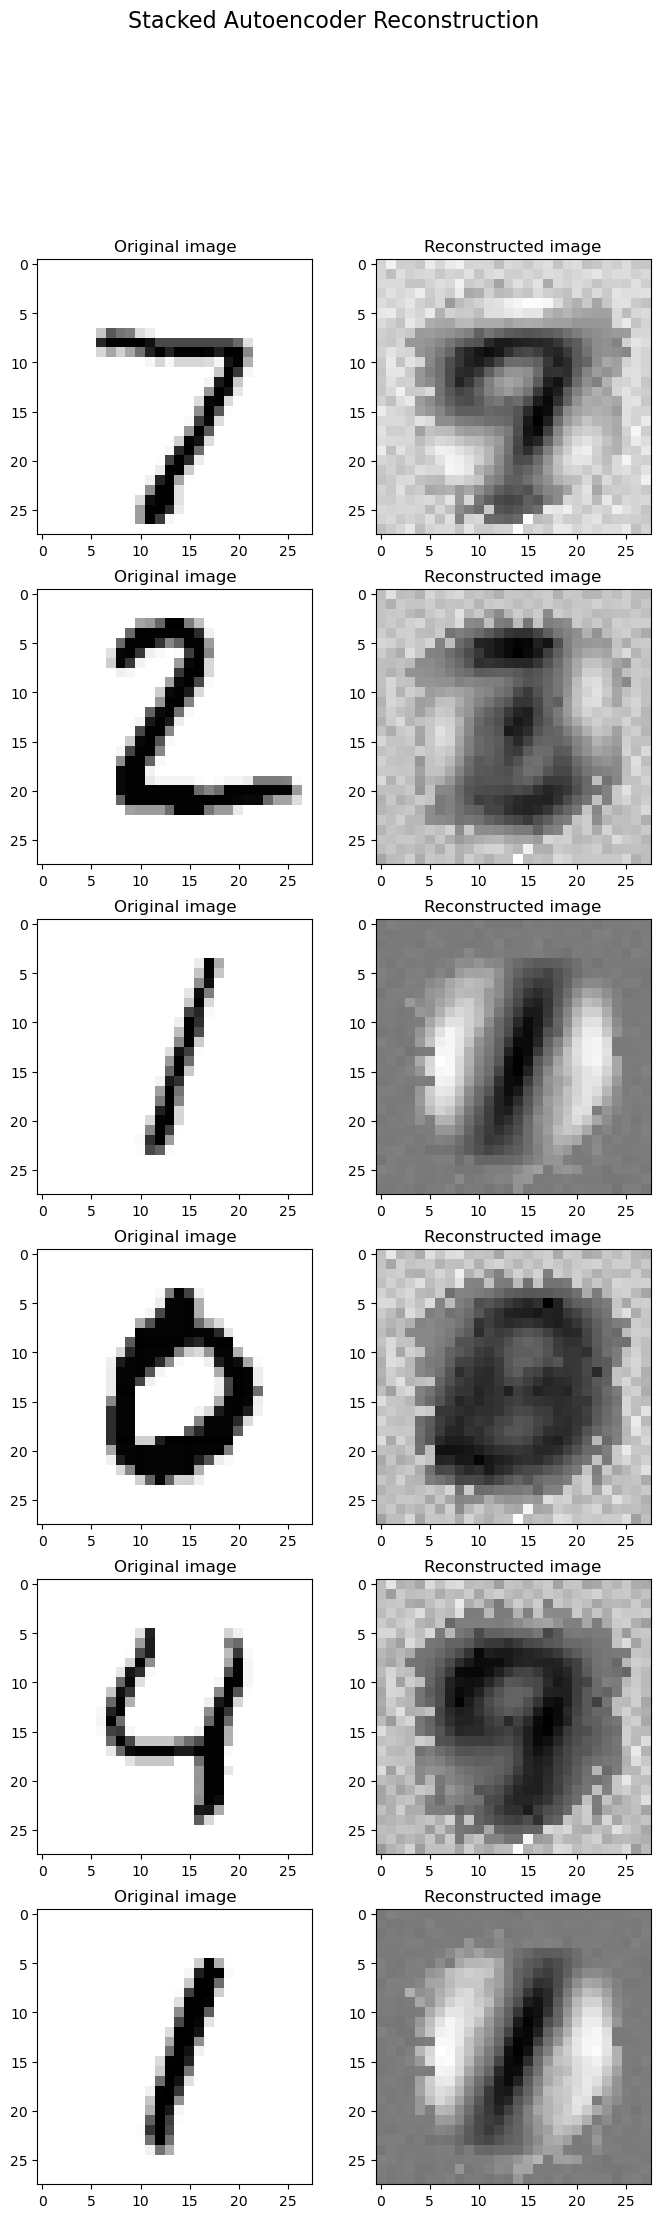

In [24]:
# visualize reconstruction
sample_size=6
test_image = x_test[:sample_size]
# reconstruct test samples

test_reconstruction = autoencode_model.predict(test_image)
plt.figure(figsize=(8,25))
plt.suptitle('Stacked Autoencoder Reconstruction', fontsize=16)

for i in range(sample_size):
    plt.subplot(sample_size,2,i*2+1)
    plt.title('Original image')
    plt.imshow(test_image[i].reshape(28,28), cmap="Greys")
    plt.subplot(sample_size,2,i*2+2)
    plt.title('Reconstructed image')
    plt.imshow(test_reconstruction[i].reshape(28,28),cmap="Greys")
plt.show()

In [ ]:
from sklearn.metrics import confusion_matrix,classification_report
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sn

preds1=densenet_model.predict(test_dataset)
y_preds1=np.argmax(preds1,axis=1)
y_test1=np.array(test_dataset.labels)

cm_data=confusion_matrix(y_test1,y_preds1)
cm=pd.DataFrame(cm_data,columns=class_labels,index=class_labels)
cm.index.name='Actual'
cm.columns.name='Predicted'
plt.figure(figsize=(20,10))
plt.title('Confusion Matrix',fontsize=20)
sn.set(font_scale=1.2)
ax=sn.heatmap(cm,cbar=False,cmap='Blues',annot=True,annot_kws={"size":16},fmt='g')